### Day 15 - beacons
https://adventofcode.com/2022/day/15

In [1]:
import re
import geopandas as gpd

In [2]:
test_data = """Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3"""

In [3]:
def radius(coords):
    s_x, s_y, b_x, b_y = coords

    return abs(s_y - b_y) + abs(s_x - b_x)

In [4]:
def coverage_light(coords, row):
    s_x, s_y, b_x, b_y = coords
    distance = radius(coords)
    coverage_coords = {
        'S' : None,
        'B' : None,
        '#' : set()
    }

    start_coords = (s_x - distance, s_y)

    c = (start_coords[0] + (row - s_y), start_coords[1] + (row - s_y)) if (row - s_y) >= 0 else (start_coords[0] - (row - s_y), start_coords[1] + (row - s_y))
    l = (2 * distance + 1) - (2 * (row - s_y)) if (row - s_y) >= 0 else (2 * distance + 1) + (2 * (row - s_y))
    
    coverage_coords['#'] = set([(c[0] + inc, c[1]) for inc in range(l)])
    coverage_coords['S'] = (s_x, s_y)
    coverage_coords['B'] = (b_x, b_y)

    return coverage_coords

In [5]:
with open("input_15.txt", "r") as input_file:
    coords = [[int(n) for n in re.findall(r'(-?\d+)', item)] for item in input_file.read().strip().split('\n')]

#coords (sensor x, sensor y, beacon x, beacon y)
#coords = [[int(n) for n in re.findall(r'(-?\d+)', item)] for item in test_data.strip().split('\n')]

In [6]:
row = 2000000
hashes = set()
bs = set()
ss = set()


for c in coords:
    tmp = coverage_light(c, row)

    hashes.update(tmp['#'])
    bs.add(tmp['B'])
    ss.add(tmp['S'])

hashes.difference_update(hashes.intersection(bs))
hashes.difference_update(hashes.intersection(ss))

len(hashes)

6078701

In [7]:
wkt = [f'POLYGON(({a+radius([a,b,c,d])} {b}, {a} {b+radius([a,b,c,d])}, {a-radius([a,b,c,d])} {b}, {a} {b-radius([a,b,c,d])}, {a+radius([a,b,c,d])} {b}))' for a,b,c,d in coords]
wkt

['POLYGON((3271747 2813277, 2983166 3101858, 2694585 2813277, 2983166 2524696, 3271747 2813277))',
 'POLYGON((4347212 122751, 2507490 1962473, 667768 122751, 2507490 -1716971, 4347212 122751))',
 'POLYGON((3816452 2510538, 3273116 3053874, 2729780 2510538, 3273116 1967202, 3816452 2510538))',
 'POLYGON((1540406 995389, 1429671 1106124, 1318936 995389, 1429671 884654, 1540406 995389))',
 'POLYGON((3435036 2260162, 2465994 3229204, 1496952 2260162, 2465994 1291120, 3435036 2260162))',
 'POLYGON((3350482 3191882, 2926899 3615465, 2503316 3191882, 2926899 2768299, 3350482 3191882))',
 'POLYGON((1566194 1021177, 1022491 1564880, 478788 1021177, 1022491 477474, 1566194 1021177))',
 'POLYGON((1675990 1130973, 1353273 1453690, 1030556 1130973, 1353273 808256, 1675990 1130973))',
 'POLYGON((1679028 2081049, 1565476 2194601, 1451924 2081049, 1565476 1967497, 1679028 2081049))',
 'POLYGON((2190705 1893566, 1841125 2243146, 1491545 1893566, 1841125 1543986, 2190705 1893566))',
 'POLYGON((1834567 7

In [8]:
capture_area = gpd.GeoDataFrame(
    {
        'pol_id' : [0]
    },
    geometry=gpd.GeoSeries.from_wkt(['POLYGON((0 0, 0 4000000, 4000000 4000000, 4000000 0, 0 0))']),
    crs='EPSG:5513'
    )
capture_area

,pol_id,geometry
0,0,"POLYGON ((0.000 0.000, 0.000 4000000.000, 4000..."


In [9]:
sensors = gpd.GeoDataFrame(
    {
        'pol_id' : [1 for _ in range(len(wkt))]
    },
    geometry=gpd.GeoSeries.from_wkt(wkt),
    crs='EPSG:5513'
    )
sensors

,pol_id,geometry
0,1,"POLYGON ((3271747.000 2813277.000, 2983166.000..."
1,1,"POLYGON ((4347212.000 122751.000, 2507490.000 ..."
2,1,"POLYGON ((3816452.000 2510538.000, 3273116.000..."
3,1,"POLYGON ((1540406.000 995389.000, 1429671.000 ..."
4,1,"POLYGON ((3435036.000 2260162.000, 2465994.000..."
5,1,"POLYGON ((3350482.000 3191882.000, 2926899.000..."
6,1,"POLYGON ((1566194.000 1021177.000, 1022491.000..."
7,1,"POLYGON ((1675990.000 1130973.000, 1353273.000..."
8,1,"POLYGON ((1679028.000 2081049.000, 1565476.000..."
9,1,"POLYGON ((2190705.000 1893566.000, 1841125.000..."


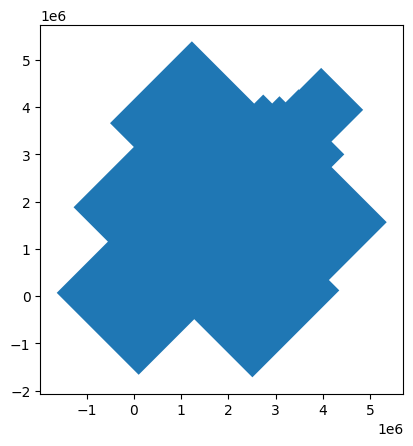

In [10]:
sensors_merged = sensors.dissolve(by='pol_id', as_index=False)
sensors_merged.plot();

In [11]:
x1, y1, x2, y2 = gpd.overlay(capture_area, sensors_merged, how='difference').total_bounds

x = int((x1 + x2) / 2)
y = int((y1 + y2) / 2)

x * 4_000_000 + y

12567351400528